# Sentiment Analysis for YELP Reviews data using CNN



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from datetime import datetime

In [2]:
train = pd.read_csv('yelp_csv_dataset.csv', nrows= 5000, names= ('class','text'))
test = pd.read_csv('yelp_csv_dataset.csv', nrows= 5000, names= ('class','text'))

In [3]:
train

,,,,,,,class,text
review_id,user_id,business_id,stars,useful,funny,cool,text,date
KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
...,...,...,...,...,...,...,...,...
vw_ZNbSmRRnNR8TCxwOMiw,yEqlc5iTOV3HpHbrbgcg5w,FHNIvNgh3fS7VZQq2Y3dsA,4.0,2,0,1,So I came here after all the hoopla on the foo...,2013-04-11 00:08:16
By8WlqTsXoV46IMPWwtMrw,nahEdT5OenB5UpJ0Ialq9Q,ZY2feSm2sc5nTXYHnKpMGQ,4.0,1,0,0,After trying the pizza here on Halloween night...,2015-12-05 11:37:33
54kBINwBwrymR7eCynYQkA,Mq1kV9Rxhxd1DFckBUOabg,bKgyXSQUGA8IHGt8ne5NuA,5.0,0,0,0,Went here today with my family and I must say ...,2015-12-21 08:16:29
Naz6TaEzsRBOT__yIvdErQ,ruM0V_9ZAHCcdXW02ZPMCw,l7b33ubze8Jqw7C4I1CAuA,1.0,0,0,0,My Room was disgusting. The odor when I walked...,2012-03-30 05:33:31


In [4]:
train.loc[train["class"] == 1, "class"] = 0
train.loc[train["class"] == 2, "class"] = 1
test.loc[test["class"] == 1, "class"] = 0
test.loc[test["class"] == 2, "class"] = 1

Let's look at how many words in each review by counting spaces in the text.

<Axes: >

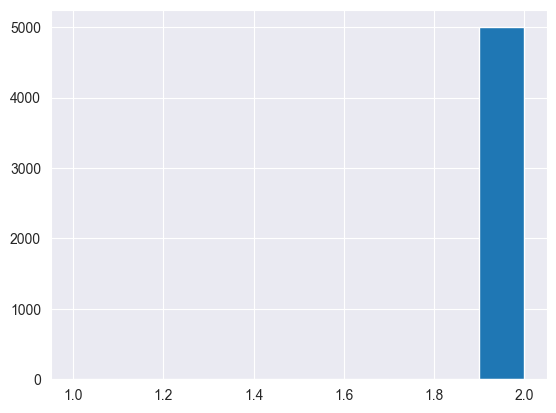

In [5]:
train["word_count"] = train["text"].str.split().str.len()
train["word_count"].hist()

In [6]:
X_train = train['text']
y_train = train['class']
X_test = test['text']
y_test = test['class']

Tokenize the text in training and testing data: choose the 20,000 most common words and set vector size as 300.

In [12]:
from keras.preprocessing.text import Tokenizer

max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)

X_train = [str(text) for text in X_train]
X_test = [str(text) for text in X_test]

tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [13]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=300)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=300)

## Convolutional Neural Networks (CNN)

Build model and add layers:


In [14]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128, input_length=300),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          2560000   
                                                                 
 dropout (Dropout)           (None, 300, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 296, 64)           41024     
                                                                 
 max_pooling1d (MaxPooling1  (None, 74, 64)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                        

### Train model

Since the data set contains 5000 rows, so we run 2 epochs maximum, with batch size of 32, and use early stop that automatically stops training when a monitored metric "val_loss" has stopped improving.

In [ ]:
!pip install --upgrade tensorflow

In [28]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Make sure X_train and y_train are NumPy arrays or TensorFlow tensors
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

history_cnn = model_cnn.fit(X_train, y_train_encoded, epochs=2, validation_split=0.3, batch_size=32, shuffle=True, callbacks=[early_stop])


Epoch 1/2
110/110 [==============================] - 26s 191ms/step - loss: -42594.6094 - accuracy: 2.8571e-04 - val_loss: -67657.7969 - val_accuracy: 0.0000e+00
Epoch 2/2
110/110 [==============================] - 20s 180ms/step - loss: -83109.5859 - accuracy: 2.8571e-04 - val_loss: -104009.3984 - val_accuracy: 0.0000e+00


### Evaluation

In [ ]:
model_cnn.evaluate(X_test, y_test)

1188/1188 [==============================] - 49s 40ms/step - loss: 0.1183 - accuracy: 0.9571


[0.11831604689359665, 0.957105278968811]

In [ ]:
pred_cnn = model_cnn.predict(X_test)

predictions_cnn = []

for i in pred_cnn:
    if i >= 0.5:
        predictions_cnn.append(1)
    else:
        predictions_cnn.append(0)

print('Accuracy on testing set:', accuracy_score(predictions_cnn, y_test))
print('Precision on testing set:', precision_score(predictions_cnn, y_test))
print('Recall on testing set:', recall_score(predictions_cnn, y_test))

Accuracy on testing set: 0.9571052631578948
Precision on testing set: 0.9568421052631579
Recall on testing set: 0.957345971563981


[Text(0, 0.5, 'no'), Text(0, 1.5, 'yes')]

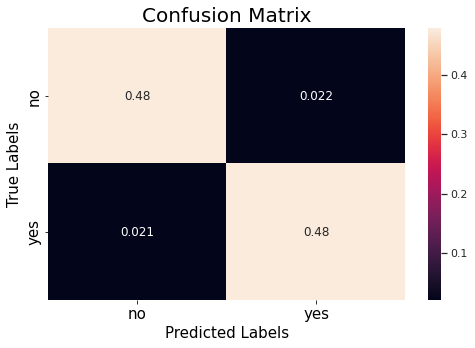

In [ ]:
matrix = confusion_matrix(predictions_cnn, y_test, normalize='all')
plt.figure(figsize=(8, 5))
ax= plt.subplot()
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels(["no","yes"], size=15)
ax.yaxis.set_ticklabels(["no","yes"], size=15)